The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [193]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [194]:
# Read in the file
path_to_csv = './data/nobel.csv'
nobel = pd.read_csv(path_to_csv)
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [195]:
# Find the most commonly awarded gender
top_gender = nobel['sex'].value_counts().idxmax()
print(f"The most commonly awarded gender is {top_gender}")

# Find the most commonly awarded birth country
top_country = nobel['birth_country'].value_counts().idxmax()
print(f"The most commonly awarded birth country is {top_country}")

The most commonly awarded gender is Male
The most commonly awarded birth country is United States of America


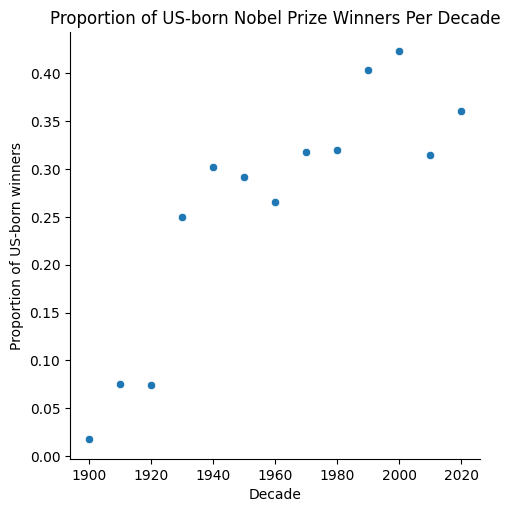

In [196]:
# Add a usa_born_winner column to nobel, where the value is True when birth_country is "United States of America"
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

# Add a decade column to nobel for the decade each prize was awarded
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)

# Create a new DataFrame named prop_usa_winners with columns decade and usa_born_winner
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Visualize the proportion of US-born winners per decade with a relational line plot
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners)
ax1.set(xlabel='Decade', ylabel='Proportion of US-born winners', title='Proportion of US-born Nobel Prize Winners Per Decade');

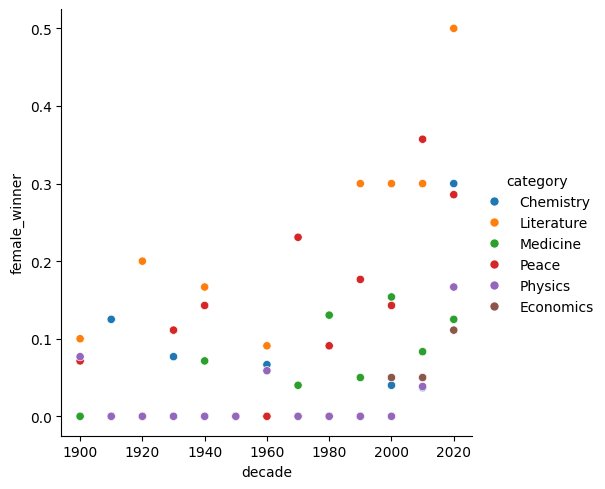

In [197]:
# Add a female_winner column to nobel, where the value is True when sex is "Female"
nobel['female_winner'] = nobel['sex'] == 'Female'

# Create a new DataFrame named prop_female_winners with columns decade, category, and female_winner
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Visualize the proportion of female laureates per decade and category with a relational line plot
ax2 = sns.relplot(x='decade', y='female_winner', data=prop_female_winners, hue='category')

ax1.set(xlabel='Decade', ylabel='Proportion of female laureates', title='Proportion of female Nobel Prize winners per decade and category');

In [198]:
# Filter the dataset to only include women laureates
women_laureates = nobel[nobel["sex"] == "Female"]

# Sort the dataset by year
women_laureates = women_laureates.sort_values(by="year")

# Get the first woman to receive a Nobel Prize
first_woman = women_laureates.iloc[0]

# Extract the name and category of the prize
first_woman_name = first_woman["full_name"]
first_woman_category = first_woman["category"]
print(f"The first woman to receive a Nobel Prize was {first_woman_name} and the category was {first_woman_category}")

The first woman to receive a Nobel Prize was Marie Curie, née Sklodowska and the category was Physics


In [199]:
# Filter the dataset to only include laureates who have won multiple Nobel Prizes
repeats = nobel["full_name"].value_counts()

# Get the full names of the repeat laureates
repeat_list = list(repeats[repeats >= 2].index)

# Print the results
print(f"The individuals or organizations who have won multiple Nobel Prizes are: {repeat_list}")

The individuals or organizations who have won multiple Nobel Prizes are: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
